In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [68]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [69]:
# geting information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [70]:
# Checking for null values in the dataset :
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

* As we can see above  name, host_name, last_review, and reviews_per_month has null values.

* For EDA  we do not require columns such as name, host_name, and last_review. hence we will drop this columns.






In [71]:
# droping the unnecessary columns from the dataset :
data.drop(['name','host_name','last_review','id'],axis=1,inplace=True)


In [72]:
# removing the null values from review_per_month column:
data.fillna({'reviews_per_month':0},inplace=True)
data.head()


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [73]:
# checking the statistics  of the dataset
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


 

*   Now the dataset is ready for Exploratory data analysis




# DISTRIBUTION

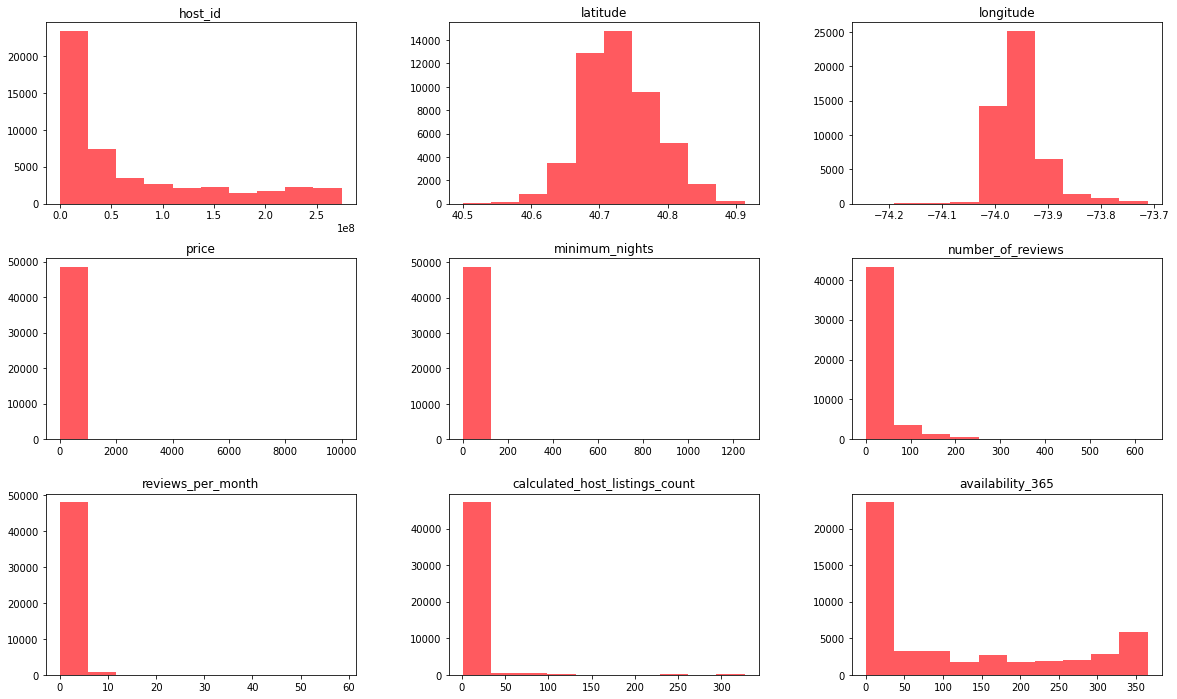

In [95]:
#Viewing distribution of numeric data
m = data.hist(figsize=(20,12), grid = False, color = '#FF5A5F')

Exploring the host_id colunm :
#Q-1 What are the top 10 host id with most listing ?

In [74]:
# Top 10 host id are :
top10 = pd.DataFrame(data.host_id.value_counts().sort_values(ascending=False).head(10))
top10.reset_index(inplace=True)
top10.rename(columns={"index": "host_id","host_id": "p_count"})
print(top10)
rank = 1,2,3,4,5,6,7,8,9,10

       index  host_id
0  219517861      327
1  107434423      232
2   30283594      121
3  137358866      103
4   16098958       96
5   12243051       96
6   61391963       91
7   22541573       87
8  200380610       65
9    7503643       52


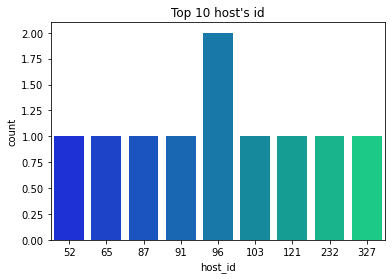

In [78]:
# visualizing the top 10 host id's :
sns.countplot(data = top10,x =top10.host_id,palette="winter")
plt.title("Top 10 host's id")
plt.show()


# Q-2 Which neighbourhood group has the highest number of listings ?

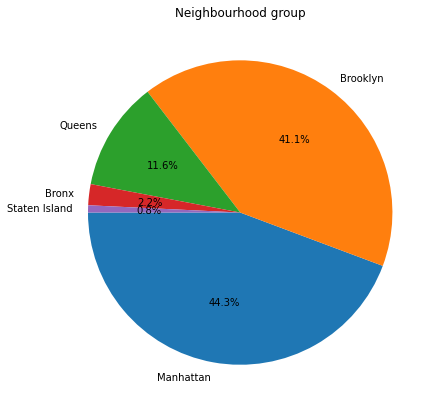

In [79]:
plt.figure(figsize=(13,7))
plt.title("Neighbourhood group")
g = plt.pie(data.neighbourhood_group.value_counts(),
            labels =data.neighbourhood_group.value_counts().index,autopct='%1.1f%%',startangle=180)
plt.show() 

* AS the pie chart suggest Manhattan and Brooklyn has the highest share of AirBnb rooms 



# Q-3 how many types of room are listed ?

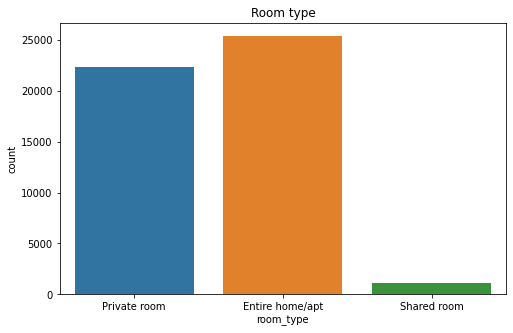

In [80]:
# cheking with visulizing room types :
plt.figure(figsize=(8,5))
plt.title("Room type")
sns.countplot(data=data,x=data.room_type)
plt.show()


* we can see that the Entire home/apt has the highest share follwed by private room.


# Q-4 Which neighbourhood has occupied which room type the most ?


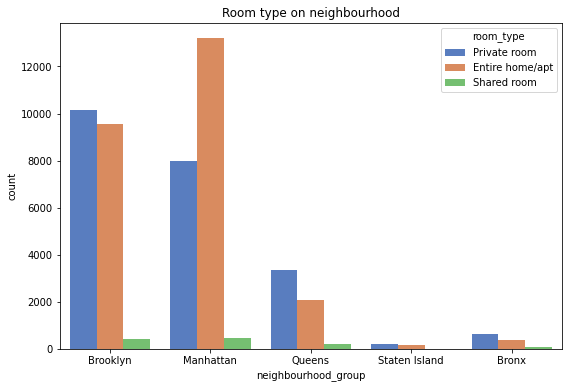

In [81]:
plt.figure(figsize=(9,6))
plt.title("Room type on neighbourhood")
sns.countplot(data= data ,x='neighbourhood_group',hue=data.room_type,palette="muted")
plt.show()

* As we can see Brooklyn has most number of private room followed by entire home/apt.

* same is with manhattan, Queens, Staten island, and Bronx

# Q-5 which neighnourhood has maximum number of houses or apartments listed ?

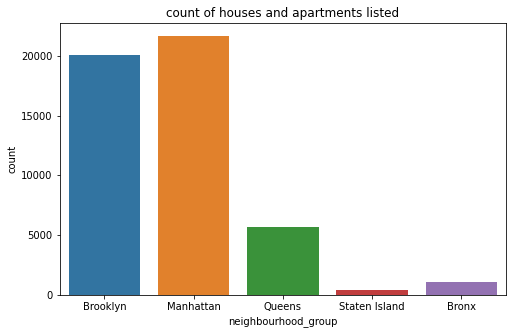

In [97]:
plt.figure(figsize=(8,5))
plt.title("count of houses and apartments listed")
sns.countplot(x = data.neighbourhood_group)
plt.show()

# Q-5 Which neighbourhood has the highest availability?


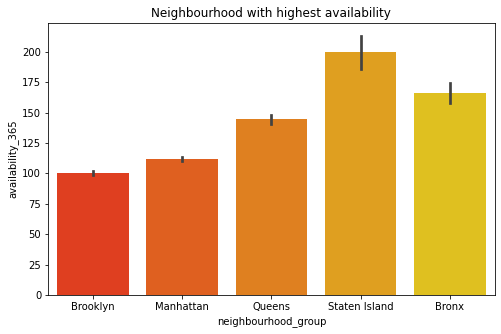

In [86]:
# checking neigbourhood with highest availability using barplot:
plt.figure(figsize=(8,5))
plt.title("Neighbourhood with highest availability")
sns.barplot(x = data.neighbourhood_group,y= data.availability_365, palette="autumn")
plt.show()

* Staten island has the highest availability follwed by Bronx, Queens, Manhattan. Brooklyn has lowest avaliabliity.

# Q-6 How are prices varying based on the neighbourhood?

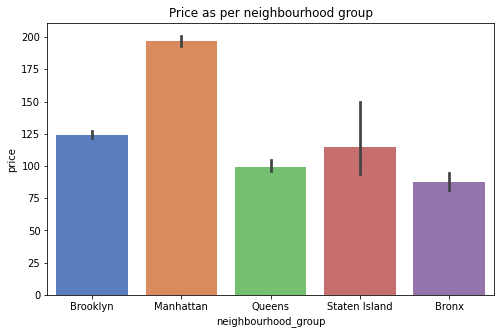

In [89]:
# checking variation of price in different neigbourhood  group  using barplot:
plt.figure(figsize=(8,5))
plt.title("Price as per neighbourhood group")
sns.barplot(x = data.neighbourhood_group, y = data.price,palette="muted")
plt.show()

* Price in Manhattan is highest and the price in Bronx is lowest .


# Q-7 What factors influence hosting prices?

In [94]:
d = corr()

7.029962163820431